<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

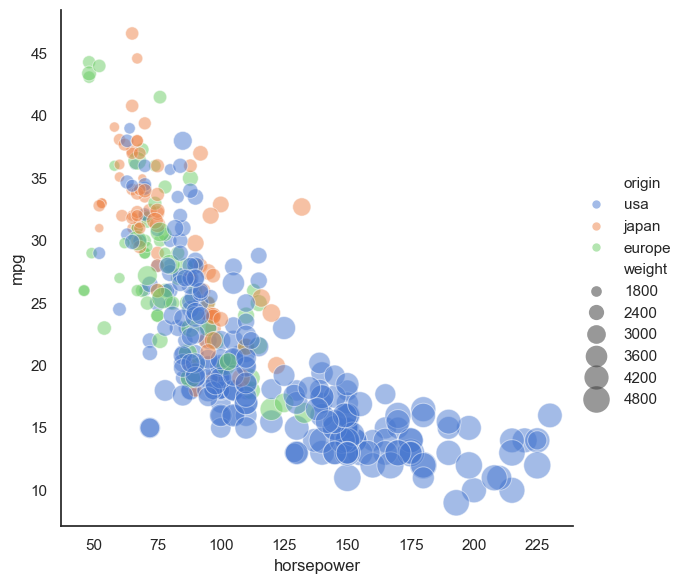

In [2]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

Text(0.5, 1.0, 'Mapa de Calor de Correlaciones del Dataset MPG')

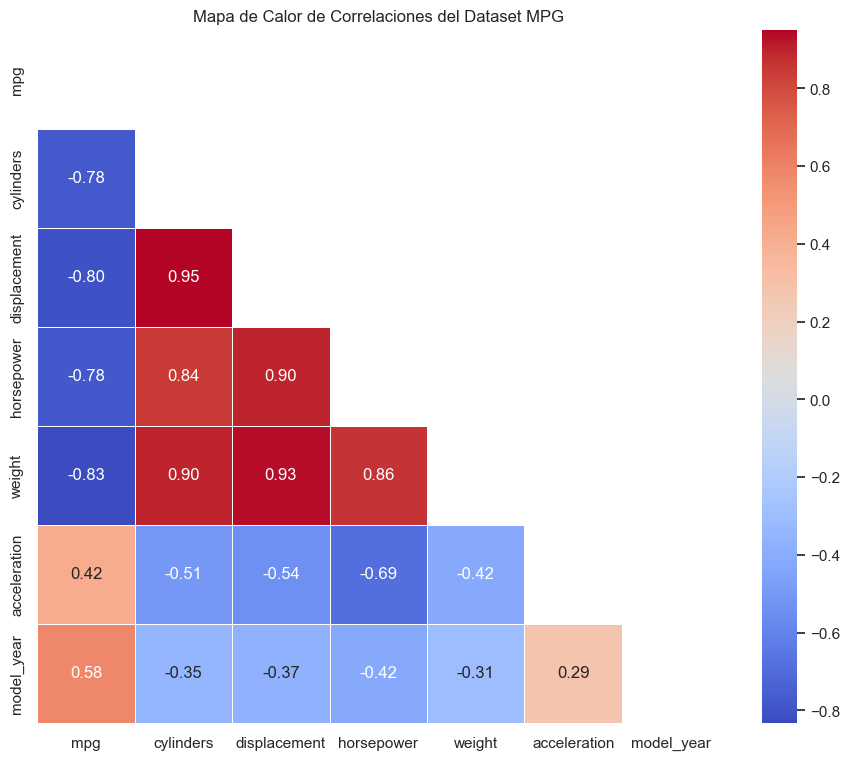

In [3]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Cargar el dataset de automóviles
mpg = sns.load_dataset("mpg")

# Seleccionar sólo las columnas numéricas
mpg_numeric = mpg.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr = mpg_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de Correlaciones del Dataset MPG")

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Cargar el dataset
mpg = sns.load_dataset("mpg")

# Eliminar filas con valores nulos en las columnas necesarias
mpg_clean = mpg[["horsepower", "mpg"]].dropna()

# Separar variables dependiente e independiente
X = mpg_clean[["horsepower"]]  # variable independiente (X)
y = mpg_clean["mpg"]           # variable dependiente (y)

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Mostrar los coeficientes del modelo
print(f"Coeficiente (pendiente): {model.coef_[0]:.4f}")
print(f"Intersección (ordenada al origen): {model.intercept_:.4f}")


Coeficiente (pendiente): -0.1626
Intersección (ordenada al origen): 40.6061


4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predecir los valores de prueba
y_pred = model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"MSE (Error cuadrático medio): {mse:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2f}")


MAE (Error absoluto medio): 3.78
MSE (Error cuadrático medio): 22.15
RMSE (Raíz del error cuadrático medio): 4.71
R² (Coeficiente de determinación): 0.57


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


In [6]:
# Cargar y limpiar datos
mpg = sns.load_dataset("mpg").dropna()
mpg_numeric = mpg.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlación
corr_matrix = mpg_numeric.corr().abs()

# Obtener el par de variables con mayor correlación (sin contar la diagonal)
corr_matrix_unstacked = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
max_corr = corr_matrix_unstacked.stack().idxmax()

print(f"Par de variables con mayor correlación: {max_corr}")


Par de variables con mayor correlación: ('cylinders', 'displacement')


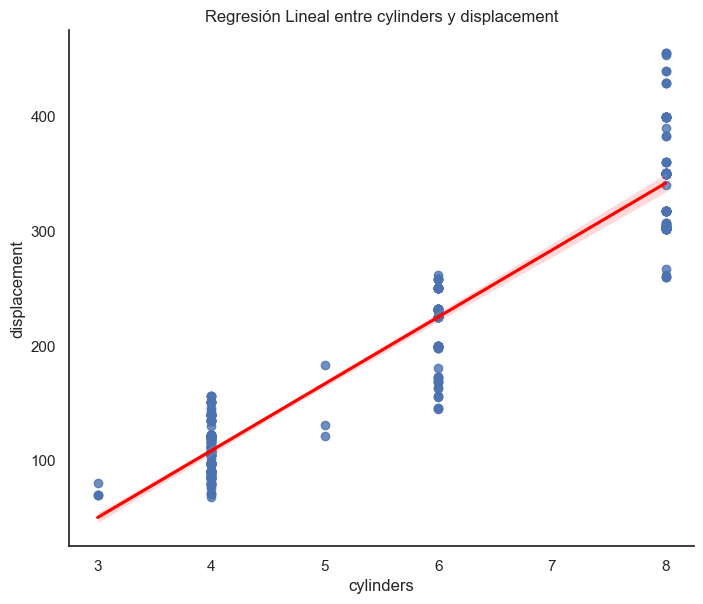

In [7]:
var_x, var_y = max_corr

# Crear gráfico de regresión
sns.lmplot(x=var_x, y=var_y, data=mpg, height=6, aspect=1.2, line_kws={"color": "red"})
plt.title(f"Regresión Lineal entre {var_x} y {var_y}")
plt.show()

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.